In [37]:
import os

ADULT_DATA_URL='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
ADULT_TEST_URL='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

DATASET_DIR="dataset"

TRAIN_DATA_FILE=os.path.join(DATASET_DIR, "adult.data")
TEST_DATA_FILE=os.path.join(DATASET_DIR, "adult.test")

FULL_COL=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# [1] Getting Dataset

In [38]:
import urllib.request
import pandas as pd


def download_dataset(directory, url, file_path):
    if not os.path.exists(file_path):
      print("[INFO] data not exists, processing download")
      # Create the specified directory if it does not exist
      if not os.path.exists(directory):
          os.makedirs(directory)

      urllib.request.urlretrieve(url, file_path)
    else:
      print("[INFO] data already exists")

In [39]:
# Download Dataset (if not exist)

download_dataset(DATASET_DIR, ADULT_DATA_URL, TRAIN_DATA_FILE)

[INFO] data already exists


# [2] Pre-process Data

In [40]:
def load_dataset(file_path, names=None):
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(file_path, header=None, index_col=False, names=names)
    return df


def drop_columns_and_rows(df, columns):
    # Drop the original moves column and any rows with missing values
    df = df.drop(columns=columns).dropna()
    return df

In [41]:
# Load the dataset into a Pandas DataFrame
df = load_dataset(TRAIN_DATA_FILE, names=FULL_COL)

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
DROP_COL = ["fnlwgt",	"education",	"race", "capital-gain",	"capital-loss"]

using_df = drop_columns_and_rows(df, DROP_COL)

In [43]:
print(using_df.shape)
using_df.head()

(32561, 10)


,age,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K


In [44]:
using_df["age"] = pd.cut(using_df["age"], [0, 10, 20, 30, 40, 50, 100])
using_df["education-num"] = pd.cut(using_df["education-num"], [0, 4, 8, 12, 16])
using_df["hours-per-week"] = pd.cut(using_df["hours-per-week"], [0, 20, 40, 60, 80, 100])
# using_df["income_over_50K"] = using_df["income"].factorize()[0]
# using_df = using_df.drop(columns=["income"])

using_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,native-country,income
0,"(30, 40]",State-gov,"(12, 16]",Never-married,Adm-clerical,Not-in-family,Male,"(20, 40]",United-States,<=50K
1,"(40, 50]",Self-emp-not-inc,"(12, 16]",Married-civ-spouse,Exec-managerial,Husband,Male,"(0, 20]",United-States,<=50K
2,"(30, 40]",Private,"(8, 12]",Divorced,Handlers-cleaners,Not-in-family,Male,"(20, 40]",United-States,<=50K
3,"(50, 100]",Private,"(4, 8]",Married-civ-spouse,Handlers-cleaners,Husband,Male,"(20, 40]",United-States,<=50K
4,"(20, 30]",Private,"(12, 16]",Married-civ-spouse,Prof-specialty,Wife,Female,"(20, 40]",Cuba,<=50K


In [45]:
preprocessed_df = pd.get_dummies(using_df, dtype='bool')

print(preprocessed_df.shape)
preprocessed_df.describe()

(32561, 98)


,"age_(0, 10]","age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 100]",workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,...,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
freq,32561,30151,24399,24015,25578,26101,30725,31601,30468,32554,...,32549,32481,32510,32543,32542,29170,32494,32545,24720,24720


# [3] Try Apriori Algorithm

In [46]:
import time
from mlxtend.frequent_patterns import apriori

# Run the Apriori algorithm and measure the time
start_time = time.time()

# Run the apriori algorithm to find frequent itemsets
apriori_results = apriori(preprocessed_df, min_support=0.4, use_colnames=True)

# measure the time
apriori_time = time.time() - start_time

# Print the apriori_results
print(apriori_results)
print("processed_time:",apriori_time)

     support                                           itemsets
0   0.697030                               (workclass_ Private)
1   0.621633                            (education-num_(8, 12])
2   0.459937               (marital-status_ Married-civ-spouse)
3   0.405178                            (relationship_ Husband)
4   0.669205                                        (sex_ Male)
5   0.615829                          (hours-per-week_(20, 40])
6   0.895857                    (native-country_ United-States)
7   0.759190                                    (income_ <=50K)
8   0.448635        (workclass_ Private, education-num_(8, 12])
9   0.458954                    (sex_ Male, workclass_ Private)
10  0.444243      (hours-per-week_(20, 40], workclass_ Private)
11  0.618378  (native-country_ United-States, workclass_ Pri...
12  0.544609                (income_ <=50K, workclass_ Private)
13  0.403059                 (sex_ Male, education-num_(8, 12])
14  0.404011   (hours-per-week_(20, 40],

# [4] Try FP-Growth Algorithm

In [47]:
from mlxtend.frequent_patterns import fpgrowth

# Run the Apriori algorithm and measure the time
start_time = time.time()

# Run the apriori algorithm to find frequent itemsets
fp_growth_results = fpgrowth(preprocessed_df, min_support=0.4, use_colnames=True)

# measure the time
fp_growth_time = time.time() - start_time

# Print the fp_growth_results
print(fp_growth_results)
print("processed_time:",fp_growth_time)

     support                                           itemsets
0   0.895857                    (native-country_ United-States)
1   0.759190                                    (income_ <=50K)
2   0.669205                                        (sex_ Male)
3   0.615829                          (hours-per-week_(20, 40])
4   0.459937               (marital-status_ Married-civ-spouse)
5   0.405178                            (relationship_ Husband)
6   0.697030                               (workclass_ Private)
7   0.621633                            (education-num_(8, 12])
8   0.675624     (income_ <=50K, native-country_ United-States)
9   0.598507         (sex_ Male, native-country_ United-States)
10  0.464605                         (income_ <=50K, sex_ Male)
11  0.458954                    (sex_ Male, workclass_ Private)
12  0.411197  (income_ <=50K, sex_ Male, native-country_ Uni...
13  0.405669  (native-country_ United-States, sex_ Male, wor...
14  0.544639  (hours-per-week_(20, 40], 

# [5] Compare both algorithms 

In [48]:
algorithms = ["Apriori", "FP-Growth"]

times = [apriori_time, fp_growth_time]
num_frequent_itemsets = [len(apriori_results), len(fp_growth_results)]

In [49]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules using the Apriori algorithm
apriori_rules = association_rules(apriori_results, metric="lift", min_threshold=1)

# Generate association rules using the FP-Growth algorithm
fp_growth_rules = association_rules(fp_growth_results, metric="lift", min_threshold=1)

# Compare the association rules in terms of the lift metric
print("Apriori association rules (mean lift):", apriori_rules["lift"].mean())
print("FP-Growth association rules (mean lift):", fp_growth_rules["lift"].mean())

mean_lifts=[apriori_rules["lift"].mean(), fp_growth_rules["lift"].mean()]

# You can also compare the association rules in terms of other metrics, such as support or confidence

Apriori association rules (mean lift): 1.2582417286274916
FP-Growth association rules (mean lift): 1.2582417286274916


In [50]:
apriori_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(workclass_ Private),"(education-num_(8, 12])",0.697030,0.621633,0.448635,0.643638,1.035398,0.015338,1.061747
1,"(education-num_(8, 12])",(workclass_ Private),0.621633,0.697030,0.448635,0.721703,1.035398,0.015338,1.088658
2,"(hours-per-week_(20, 40])",(workclass_ Private),0.615829,0.697030,0.444243,0.721374,1.034926,0.014992,1.087373
3,(workclass_ Private),"(hours-per-week_(20, 40])",0.697030,0.615829,0.444243,0.637337,1.034926,0.014992,1.059306
4,(income_ <=50K),(workclass_ Private),0.759190,0.697030,0.544609,0.717354,1.029158,0.015430,1.071907


In [51]:
fp_growth_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(income_ <=50K),"(hours-per-week_(20, 40])",0.759190,0.615829,0.499432,0.657848,1.068232,0.031901,1.122808
1,"(hours-per-week_(20, 40])",(income_ <=50K),0.615829,0.759190,0.499432,0.810991,1.068232,0.031901,1.274067
2,"(hours-per-week_(20, 40])",(workclass_ Private),0.615829,0.697030,0.444243,0.721374,1.034926,0.014992,1.087373
3,(workclass_ Private),"(hours-per-week_(20, 40])",0.697030,0.615829,0.444243,0.637337,1.034926,0.014992,1.059306
4,"(hours-per-week_(20, 40])","(education-num_(8, 12])",0.615829,0.621633,0.404011,0.656044,1.055356,0.021191,1.100045


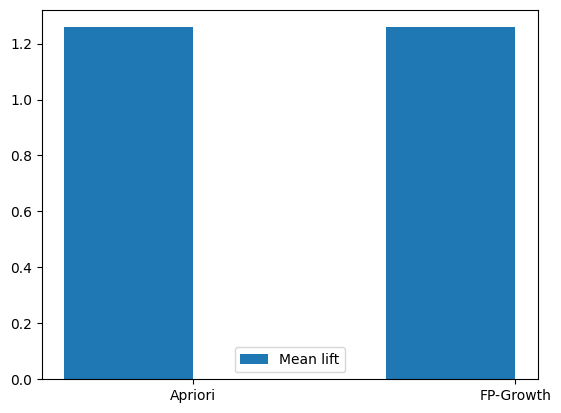

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Set the width of the bars
bar_width = 0.4

# Set the positions of the bars
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Create the bars
plt.bar(r1, mean_lifts, width=bar_width, label='Mean lift')

# Add the x-tick labels and legend
plt.xticks([r + bar_width/2 for r in r1], algorithms)
plt.legend()

# Show the plot
plt.show()
